<a href="https://colab.research.google.com/github/Supathatkh/datasci_/blob/main/06t_01_similarity_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Similarity Matching

อ.ดร.ธนชาตย์ ฤทธิ์บำรุง (อ.เชค)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ai-builders/curriculum/blob/main/notebooks/06t_01_similarity_matching.ipynb)


**เป้าหมายการเรียนรู้**
1. เข้าใจถึงการใช้ Similarity Index และ Distance ในการวัดความเหมือนของสองสิ่ง
2. สามารถเลือกใช้ Similarity Index และ Distance ที่เหมาะสมได้
3. สามารถประยุกต์ใช้ Similarity Index และ Distance กับโจทย์ต่างๆ ได้

# How do we measure similarity?

เรารู้ได้ยังไงว่าใครเหมือนกัน แล้วจะวัดออกมาเป็นค่าได้อย่างไร?

อย่างในกรณีด้านล่าง คู่ใด มีความเหมือนกันมากที่สุด?

*   Jenny - Mary
*   Jenny - Bobby
*   Mary - Bobby

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/48.png width="750px">

## Similarity Index

*   Similarity Index เป็นเทคนิคในการวัดความเหมือนระหว่างของสองสิ่ง เช่น ความเหมือนของคน ความเหมือนของเอกสาร เป็นต้น
*   มีสูตรหลากหลายในการวัด Similarity Index

### Jaccard Similarity

$$ Jaccard(U,V) = \frac{|U \cap V|}{|U \cup V|} $$

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/49.jpg width="750px">

cr: https://medium.com/data-cafe-thailand/%E0%B9%80%E0%B8%A1%E0%B8%B7%E0%B9%88%E0%B8%AD%E0%B8%AA%E0%B8%B2%E0%B8%A2-data-%E0%B8%AD%E0%B8%A2%E0%B8%B2%E0%B8%81%E0%B8%88%E0%B8%B0%E0%B8%81%E0%B8%B4%E0%B8%99-pizza-%E0%B9%82%E0%B8%94%E0%B8%A2%E0%B9%83%E0%B8%8A%E0%B9%89-jaccard-similarity-%E0%B9%81%E0%B8%A5%E0%B8%B0-cosine-similarity-f921fa4ab043

In [1]:
Jenny = ['Shabu Shabu', 'Sushi', 'Somtam']
Mary = ['Shabu Shabu', 'Sushi', 'Krapow']
Bobby = ['Ramen', 'Moo Krata', 'Krapow']

In [2]:
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(set(list1)) + len(set(list2))) - intersection
    return float(intersection) / union

In [3]:
print('Jenny - Mary :' + str(jaccard_similarity(Jenny, Mary)))
print('Jenny - Bobby :' + str(jaccard_similarity(Jenny, Bobby)))
print('Mary - Bobby :' + str(jaccard_similarity(Mary, Bobby)))

Jenny - Mary :0.5
Jenny - Bobby :0.0
Mary - Bobby :0.2


In [4]:
## Convert to boolean array

Food = ['Shabu Shabu', 'Sushi', 'Somtam', 'Krapow', 'Ramen', 'Moo Krata']
Jenny = [1, 1, 1, 0 , 0, 0,]
Mary = [1, 1, 0, 1, 0, 0]
Bobby = [0, 0, 0, 1, 1, 1]

In [5]:
import pandas as pd

df = pd.DataFrame([Jenny, Mary, Bobby], columns=Food, index=['Jenny', 'Mary', 'Bobby'])
df

,Shabu Shabu,Sushi,Somtam,Krapow,Ramen,Moo Krata
Jenny,1,1,1,0,0,0
Mary,1,1,0,1,0,0
Bobby,0,0,0,1,1,1


In [6]:
## Jaccard Similarity = 1 - Jaccard Distance

from scipy.spatial import distance

1 - distance.jaccard(df[df.index=='Jenny'], df[df.index=='Mary'])

0.5

In [7]:
print('Jenny - Mary :' + str(1-distance.jaccard(df[df.index=='Jenny'], df[df.index=='Mary'])))
print('Jenny - Bobby :' + str(1-distance.jaccard(df[df.index=='Jenny'], df[df.index=='Bobby'])))
print('Mary - Bobby :' + str(1-distance.jaccard(df[df.index=='Mary'], df[df.index=='Bobby'])))

Jenny - Mary :0.5
Jenny - Bobby :0.0
Mary - Bobby :0.19999999999999996


### Cosine Similarity

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/50.jpg width="500px">

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/51.jpg width="750px">

cr: https://deepai.org/machine-learning-glossary-and-terms/cosine-similarity

In [8]:
## Cosine Similarity = 1 - Cosine Distance

from scipy.spatial import distance

1 - distance.cosine(df[df.index=='Jenny'], df[df.index=='Mary'])

0.6666666666666666

In [9]:
print('Jenny - Mary :' + str(1-distance.cosine(df[df.index=='Jenny'], df[df.index=='Mary'])))
print('Jenny - Bobby :' + str(1-distance.cosine(df[df.index=='Jenny'], df[df.index=='Bobby'])))
print('Mary - Bobby :' + str(1-distance.cosine(df[df.index=='Mary'], df[df.index=='Bobby'])))

Jenny - Mary :0.6666666666666666
Jenny - Bobby :0.0
Mary - Bobby :0.33333333333333326


### Euclidean Distance

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/52.png width="750px">

In [10]:
Jenny = [3, 5, 4, 1 , 0, 1,]
Mary = [5, 4, 3, 5, 2, 1]
Bobby = [1, 2, 1, 5, 4, 5]

df = pd.DataFrame([Jenny, Mary, Bobby], columns=Food, index=['Jenny', 'Mary', 'Bobby'])
df

,Shabu Shabu,Sushi,Somtam,Krapow,Ramen,Moo Krata
Jenny,3,5,4,1,0,1
Mary,5,4,3,5,2,1
Bobby,1,2,1,5,4,5


In [11]:
distance.euclidean(df[df.index=='Jenny'], df[df.index=='Mary'])

5.0990195135927845

In [12]:
print('Jenny - Mary :' + str(distance.euclidean(df[df.index=='Jenny'], df[df.index=='Mary'])))
print('Jenny - Bobby :' + str(distance.euclidean(df[df.index=='Jenny'], df[df.index=='Bobby'])))
print('Mary - Bobby :' + str(distance.euclidean(df[df.index=='Mary'], df[df.index=='Bobby'])))

Jenny - Mary :5.0990195135927845
Jenny - Bobby :8.366600265340756
Mary - Bobby :6.6332495807108


In [13]:
A = [5, 100]
B = [10, 150]
C = [10, 100]

print('A - B :' + str(distance.euclidean(A,B)))
print('A - C :' + str(distance.euclidean(A,C)))
print('B - C :' + str(distance.euclidean(B,C)))

A - B :50.24937810560445
A - C :5.0
B - C :50.0


# Product Recommendation

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/53.png width="750px">

## Apiori - Market Basket

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/54.png width="750px">

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/55.png width="750px">

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/56.png width="750px">

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/57.png width="750px">

In [14]:
import pandas as pd

url = 'https://github.com/ai-builders/curriculum/raw/main/data/BreadBasket_DMS.csv'

df = pd.read_csv(url)

In [15]:
df.head(5)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [16]:
missing = df.isnull().sum()
print(missing)

Date           0
Time           0
Transaction    0
Item           0
dtype: int64


In [17]:
df.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [18]:
df.loc[df["Item"]=='NONE'].shape[0]

df = df[df["Item"] != 'NONE']

In [19]:
hot_encoded_df=df.groupby(['Transaction','Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')

In [20]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
hot_encoded_df = hot_encoded_df.applymap(encode_units)

In [21]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(hot_encoded_df, min_support=0.01, use_colnames=True)

In [22]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
1,(Coffee),(Alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936
2,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306
3,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
4,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293
5,(Coffee),(Brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
7,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
8,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
9,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125


In [23]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
12,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
14,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
24,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
26,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235


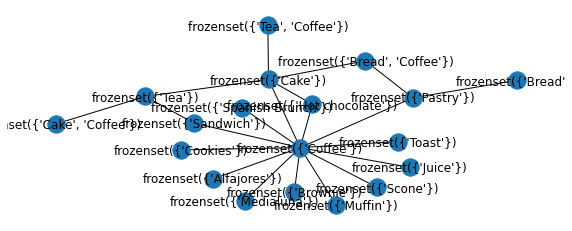

In [24]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

## Collaborative Filtering

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/58.png width="750px">

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/59.png width="750px">

<img src=https://github.com/ai-builders/curriculum/raw/main/images/tabular_images/60.png width="750px">

In [25]:
item_item_matrix = pd.DataFrame(index=hot_encoded_df.columns,columns=hot_encoded_df.columns)

In [26]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(hot_encoded_df.iloc[:,i],hot_encoded_df.iloc[:,j])

In [27]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [28]:
links_filtered=links.loc[ (links['value'] > 0.1) & 
                         (links['item'] != links['related item']) ]

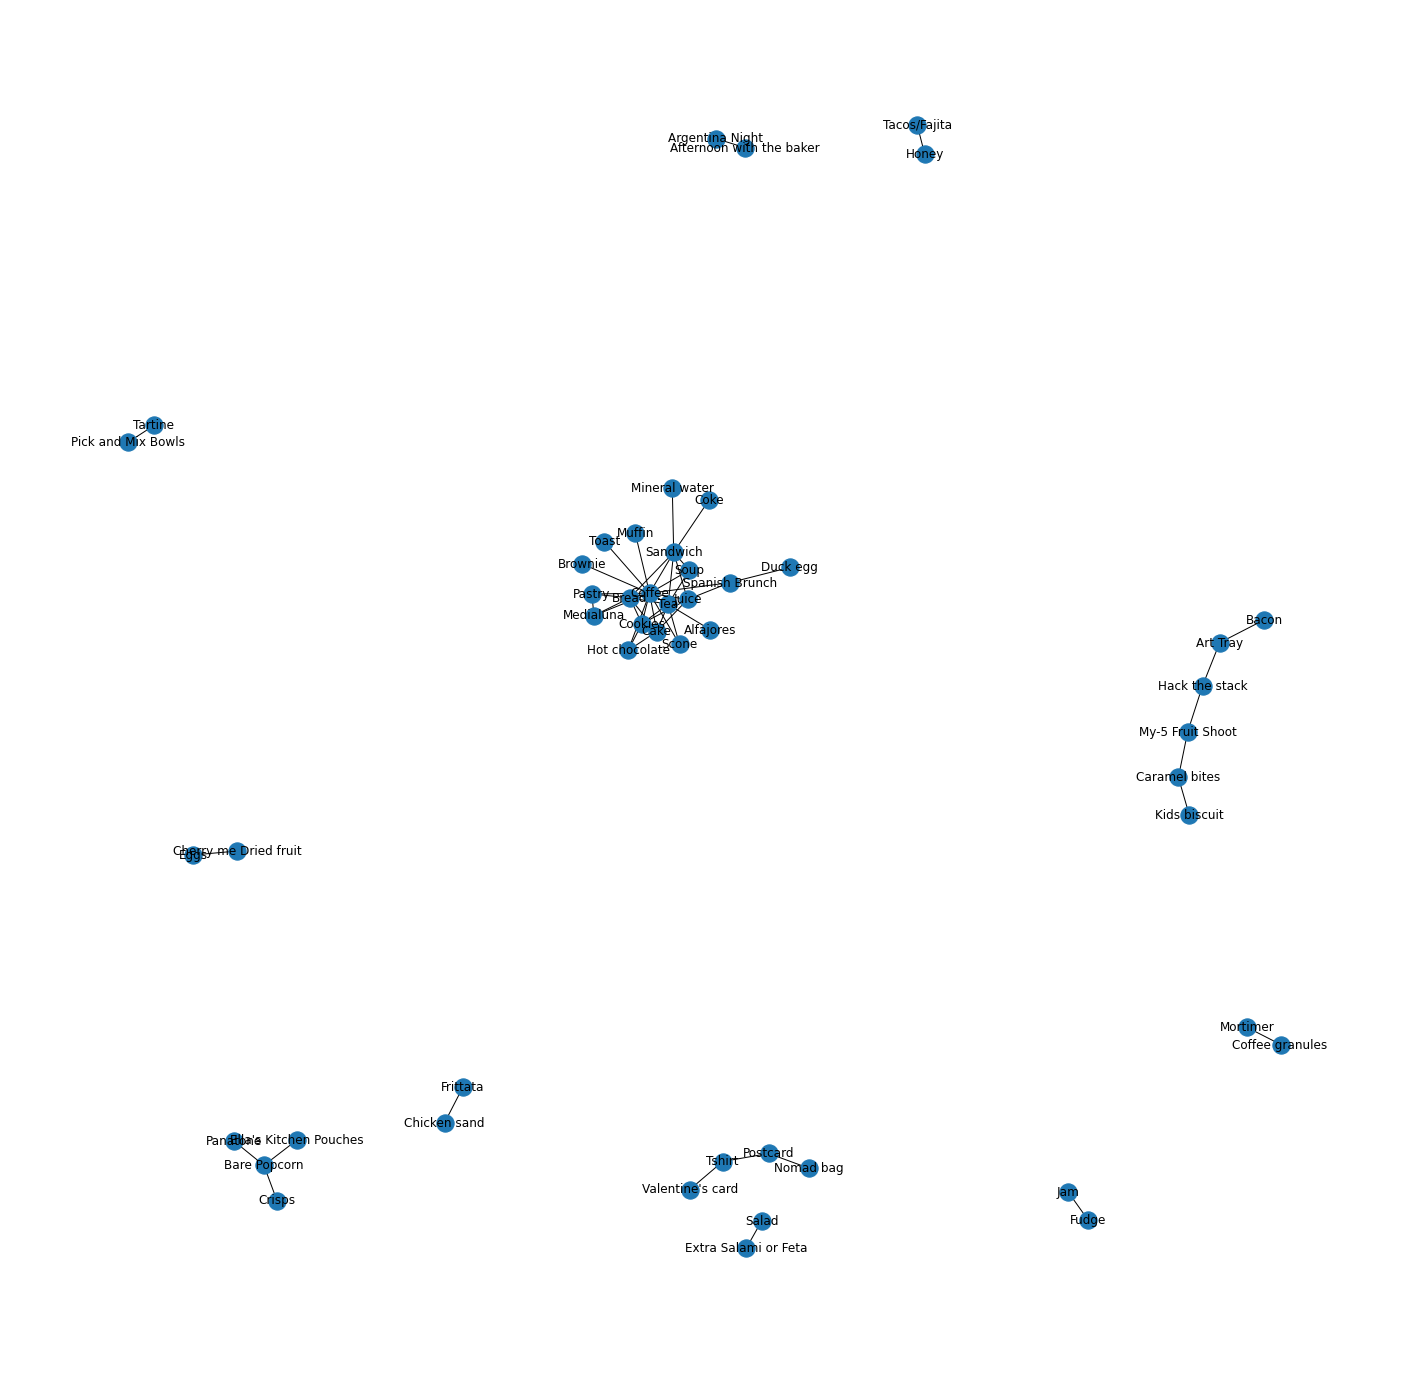

In [29]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(25,25))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
pos = nx.spring_layout(GA)
nx.draw(GA, pos, with_labels=True)
plt.show()

# Checkpoint ท้ายบท

*   ☑️ เข้าใจเทคนิคการวิเคราะห์ Similarity Matching
*   ☑️ เข้าใจถึงกระบวนการในการนำ Similarity Matching ไปใช้